In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nk
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer


In [49]:
data = pd.read_csv('../data/raw_analyst_ratings.csv')
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


#### Statistics for headline length


In [50]:
data['headline-length'] = data['headline'].apply(len)
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline-length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [51]:
data['headline-length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline-length, dtype: float64

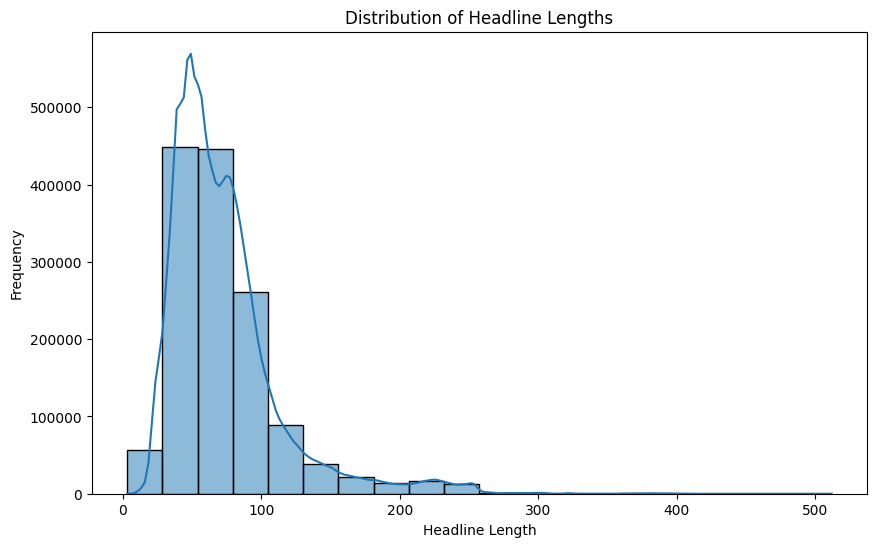

In [52]:
plt.figure(figsize=(10, 6))

# Plot the histogram of headline lengths
sns.histplot(data['headline-length'], bins=20, kde=True)

# Add titles and labels
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### Number of articles per publisher

In [53]:
publisher_counts = data['publisher'].value_counts()
publisher_counts

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

In [54]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['day_of_week'] = data['date'].dt.day_name()
date_analysis = data['day_of_week'].value_counts()
date_analysis

day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64

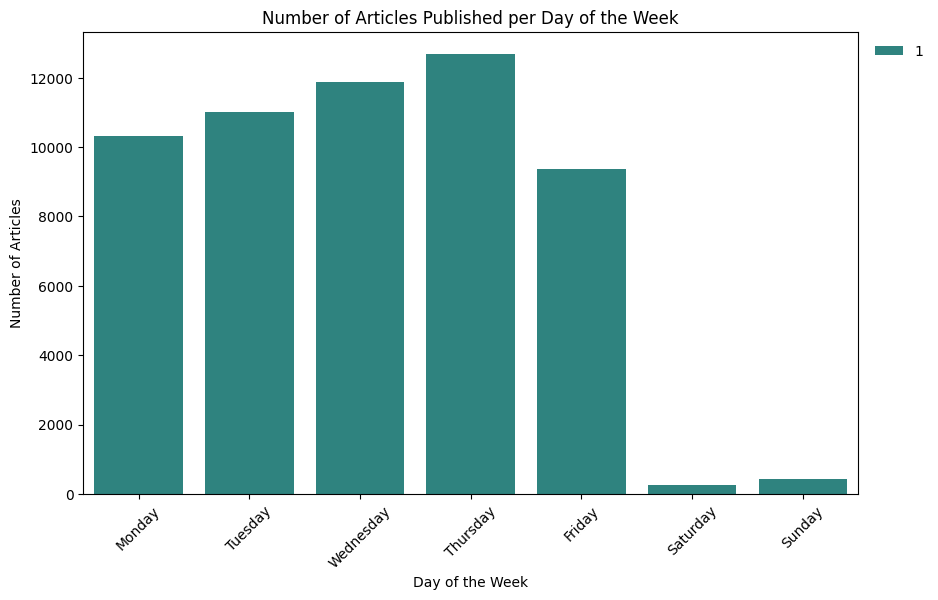

In [55]:
plt.figure(figsize=(10, 6))

# Use countplot to visualize the count of articles for each day of the week
sns.countplot(x='day_of_week', hue=1, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], data=data)

# Add titles and labels
plt.title('Number of Articles Published per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')

# Remove legend as it's not needed in this case
plt.legend(title=None, loc='upper right', bbox_to_anchor=(1.1, 1), frameon=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Sentiment analysis on Headlines

In [56]:
nk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [58]:
data['sentiment'] = data['headline'].apply(get_sentiment)

In [59]:
print(data[['headline', 'sentiment']].head())

                                            headline sentiment
0            Stocks That Hit 52-Week Highs On Friday   Neutral
1         Stocks That Hit 52-Week Highs On Wednesday   Neutral
2                      71 Biggest Movers From Friday   Neutral
3       46 Stocks Moving In Friday's Mid-Day Session   Neutral
4  B of A Securities Maintains Neutral on Agilent...   Neutral


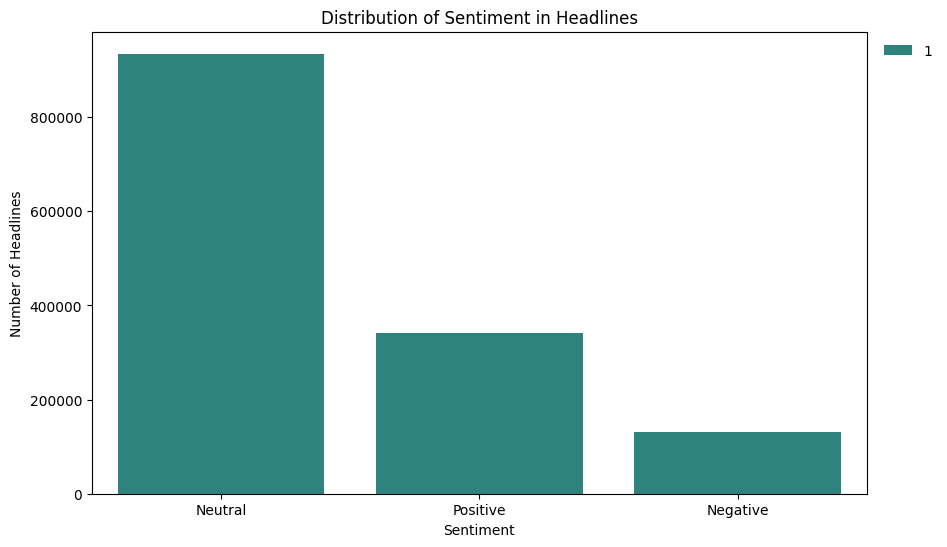

In [60]:
# Create a count plot for sentiment distribution
plt.figure(figsize=(10, 6))

# Use countplot to visualize the sentiment distribution with a dummy hue variable
sns.countplot(x='sentiment', hue=1, data=data, palette='viridis')

# Add titles and labels
plt.title('Distribution of Sentiment in Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')

# Remove the legend as it's not necessary for this plot
plt.legend(title=None, loc='upper right', bbox_to_anchor=(1.1, 1), frameon=False)

# Show the plot
plt.show()

#### Identify common keywords

In [61]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  # unigram and bigram
tfidf_matrix = tfidf_vectorizer.fit_transform(data['headline'])

# Get feature names and scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a DataFrame to display the keywords and their scores
keywords_df = pd.DataFrame({'Keyword': feature_names, 'Score': tfidf_scores})
keywords_df = keywords_df.sort_values(by='Score', ascending=False)

# Show the top 10 keywords
print(keywords_df.head(10))

            Keyword         Score
1759933      stocks  22021.282599
399339     benzinga  16700.621206
1173296      market  16043.268142
1952079          vs  13114.083683
730398     earnings  12976.936379
1973530        week  12471.089457
773774          est  12112.343959
153900           52  11336.664494
710339   downgrades  11153.723042
1913495    upgrades  11017.050619


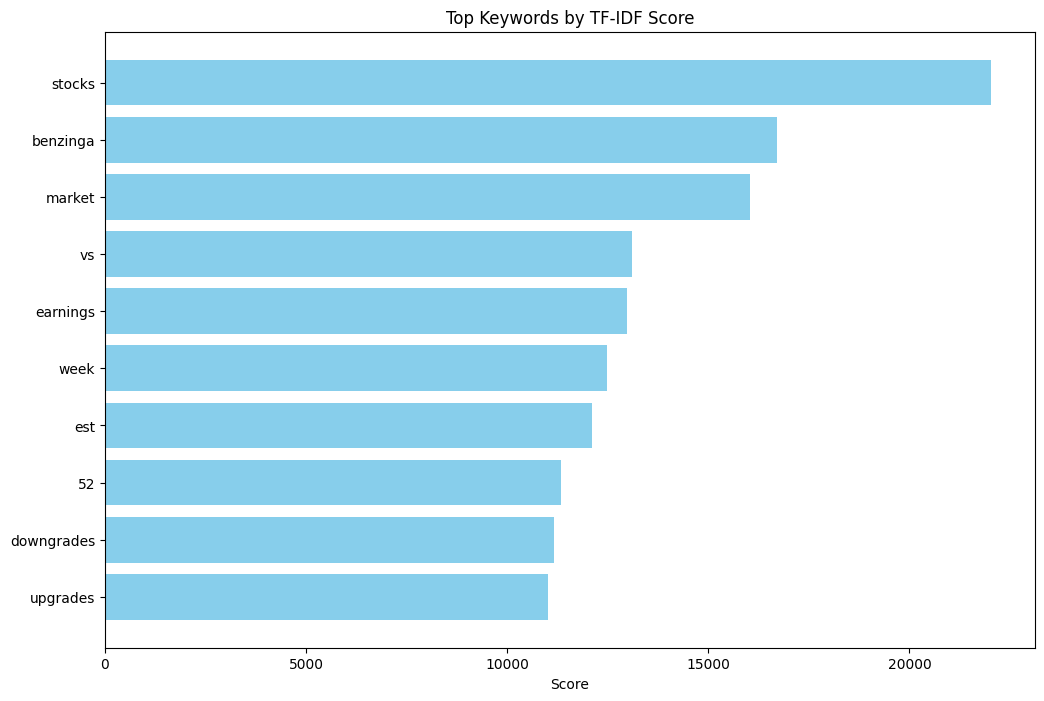

In [62]:
# Plot the top keywords
plt.figure(figsize=(12, 8))
top_keywords = keywords_df.head(10)
plt.barh(top_keywords['Keyword'], top_keywords['Score'], color='skyblue')
plt.xlabel('Score')
plt.title('Top Keywords by TF-IDF Score')
plt.gca().invert_yaxis()
plt.show()

#### Time Series Analysis

C:\Users\pc\AppData\Local\Temp\ipykernel_13072\1130828826.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = data.resample('M').size()


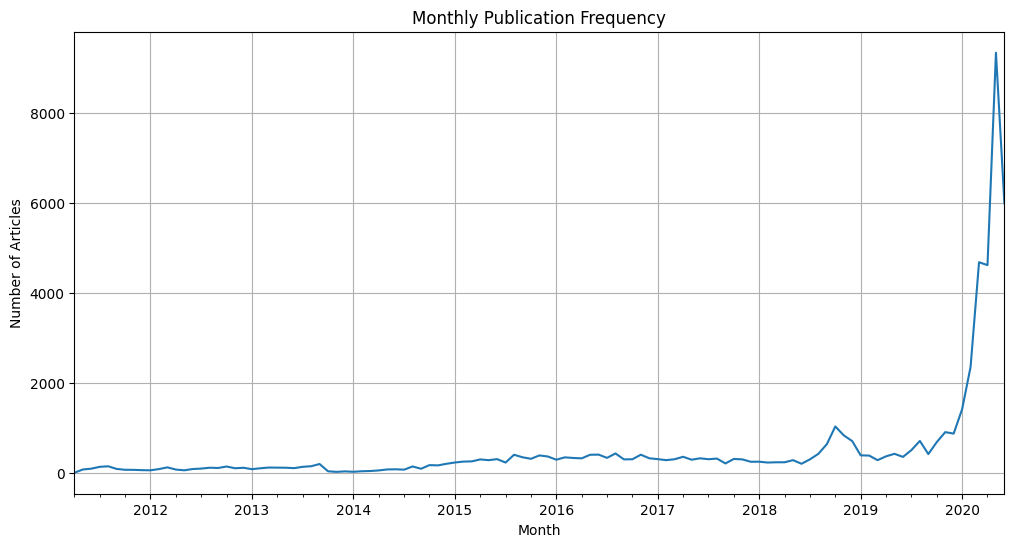

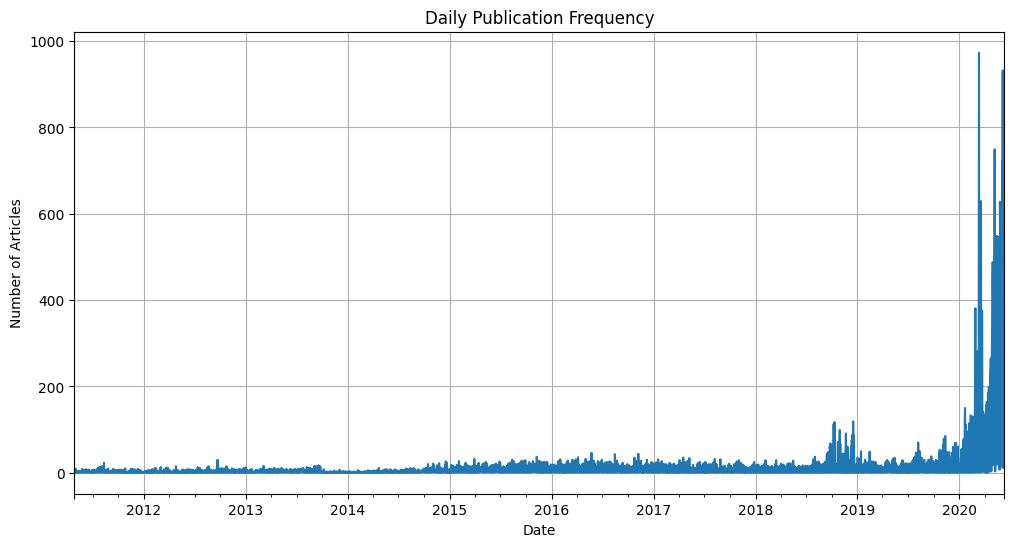

In [63]:
data.dropna(subset=['date'], inplace=True)
data.set_index('date', inplace=True)
monthly_counts = data.resample('M').size()
daily_counts = data.resample('D').size()

# Plot monthly publication counts
plt.figure(figsize=(12, 6))
monthly_counts.plot(title='Monthly Publication Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# Plot daily publication counts
plt.figure(figsize=(12, 6))
daily_counts.plot(title='Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

#### Publisher Analysis

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_13072\2453481343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')


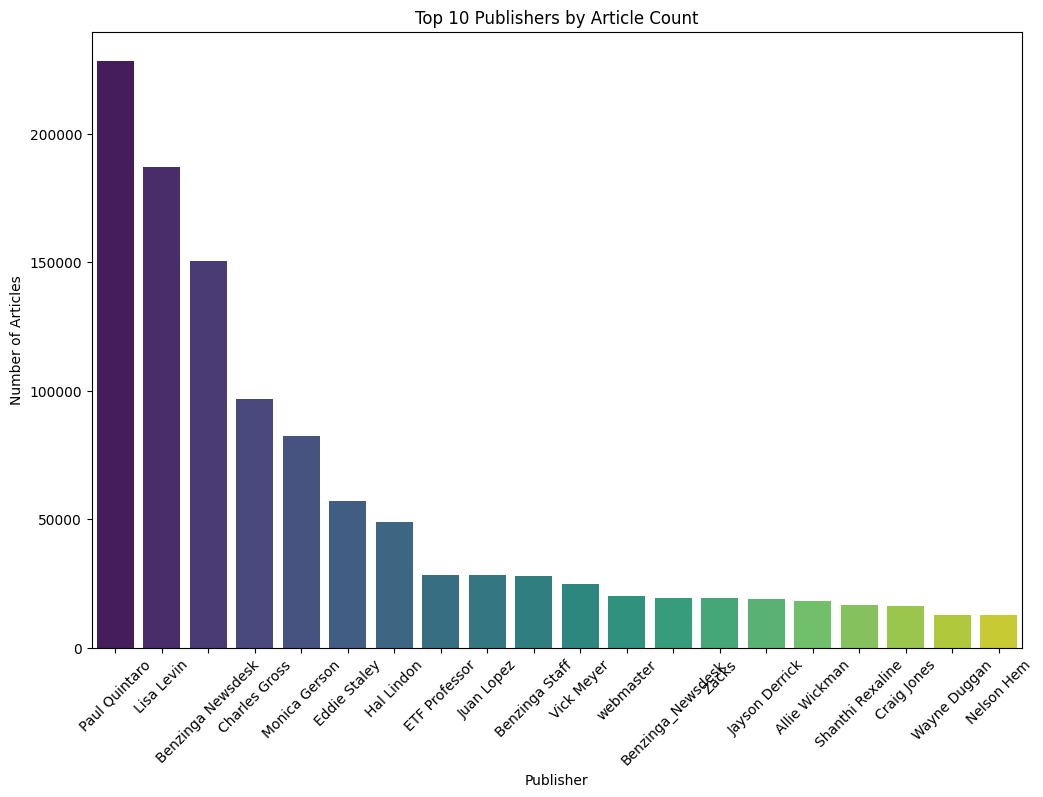

In [64]:
# Top publishers
top_publishers = publisher_counts.head(20)
print(top_publishers)

# Visualize the number of articles per top publisher
plt.figure(figsize=(12, 8))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()